In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree,metrics
from sklearn.model_selection import train_test_split

In [4]:
# The digits dataset
digits = datasets.load_digits()

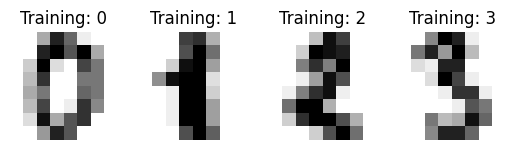

In [5]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]): 
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)
plt.show();

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [7]:
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)

In [8]:
# Split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [9]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [10]:
predicted = classifier.predict(X_test)

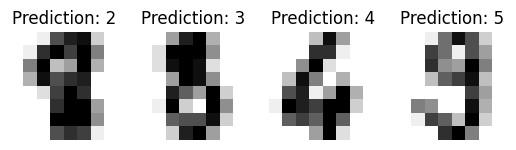

In [11]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]): 
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show();

In [14]:
print("Classification report for classifier %s: \n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))
disp = metrics.confusion_matrix(Y_test,predicted)
# disp.figure._suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s"%disp.confusion_matrix)

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33): 
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360




In [15]:
from PIL import Image, ImageOps
import numpy as np

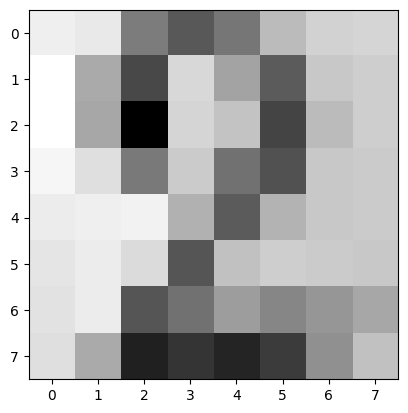

In [55]:
# Open image
img = Image.open('sample_2.jpg').convert("L").resize((8,8))
# Invert image
img = ImageOps.invert(img)
# Convert to numpy array
im2arr = np.array(img)
# Show
plt.imshow(im2arr, cmap = plt.cm.gray_r, interpolation = 'nearest')

In [56]:
# Change from 2d array (8x8) to 1d array (1x64)
img1d = im2arr.reshape([1,64])
# normailize black & white image array
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d


array([[  0,   0, 155, 155, 155,   0,   0,   0,   0,   0, 155,   0,   0,
        155,   0,   0,   0,   0, 155,   0,   0, 155,   0,   0,   0,   0,
        155,   0, 155, 155,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0, 155, 155,
          0, 155,   0,   0,   0,   0, 155, 155, 155, 155,   0,   0]],
      dtype=uint8)

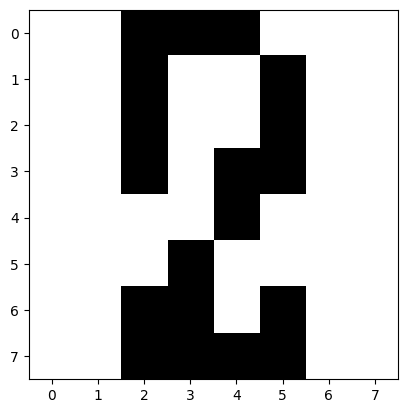

In [57]:
# After normalize
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [58]:
# Predict label of number
Y_pred = classifier.predict(img1d)
print(Y_pred)

[2]
